# Caderno de exploração dos dados DATASUS de 2008 em diante

In [17]:
# importando as bibliotecas necessárias
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 57: invalid continuation byte
## resolução: encoding = 'ISO-8859-1'

In [3]:
# ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 154
## resolução: skiprows = 3
### descartando as 3 primeiras linhas

**encoding**: escolhe o encoding para ser utilizado na leitura e escrita 

**skiprows**: descarta as primeiras linhas indicadas pelo valor passado

**sep**: escolhe o delimitador a ser utilizado

**skipfooter**: descarta as ultimas linhas indicadas pelo valor passado

**thousands**: escolhe o separador dos milhares

**decimal**: escolha o separador dos decimais

In [4]:
# carregando a base de dados
dados = pd.read_csv('A151346189_28_143_208.csv', 
                    encoding = 'ISO-8859-1', 
                    skiprows= 3, 
                    sep = ';', 
                    skipfooter= 12, 
                    thousands= '.', 
                    decimal= ',')

/home/heliorlz/anaconda3/envs/alura/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [5]:
# visualizando os 5 primeiros registros
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,3.050109e+08
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,4.437116e+09


In [6]:
# visualizando os 5 ultimos registros
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,90775418.13,94908336.74,91437940.91,1.028761e+08,83000318.02,82381774.95,86051002.13,1.005310e+08,101374341.51,1.195865e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,17895244.76,18115134.64,19542439.88,1.903279e+07,17410262.53,17913161.92,17331445.92,1.875556e+07,19241624.02,2.172158e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,15029205.51,15249241.20,15046851.63,1.488682e+07,12546999.04,13604225.34,13151005.63,1.637164e+07,17790649.87,2.036924e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,34873099.14,35775375.69,35005746.36,3.479399e+07,30896577.34,34305180.56,35701473.15,3.940505e+07,43984702.05,4.657350e+09
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,18769437.77,22341629.09,20643441.06,2.294716e+07,21536505.16,19058243.91,22704335.27,2.526977e+07,26526196.39,2.429933e+09


In [7]:
# formnatando a saida dos numeros float
pd.options.display.float_format = '{:.2f}'.format

In [8]:
# gasto médio por Estado em cada mês
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

In [9]:
# acessando uma única coluna do nosso DataFrame -> retornando uma Series
dados['2008/Ago']

0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

In [10]:
# gasto médio do mês de agosto do ano de 2008
dados['2008/Ago'].mean()

27800320.306666665

<AxesSubplot:xlabel='Unidade da Federação'>

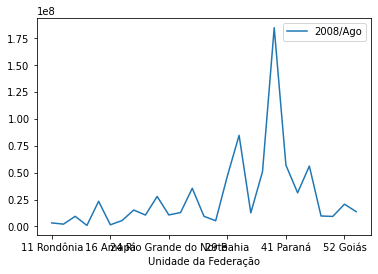

In [11]:
# criando um gráfico básico para visualizar os gastos por Unidade da Federação no mês de agosto de 2008 
dados.plot(x = 'Unidade da Federação', y = '2008/Ago')

<AxesSubplot:xlabel='Unidade da Federação'>

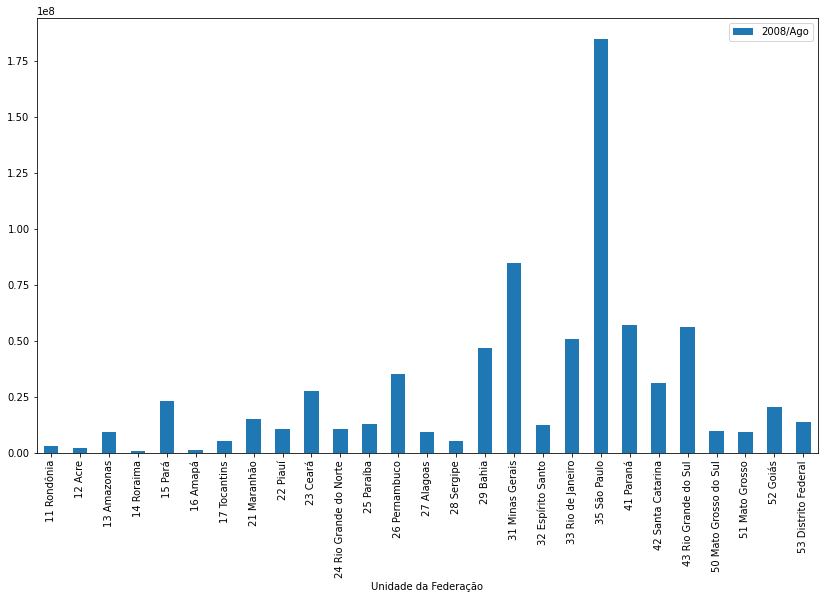

In [14]:
# melhorando o gráfico anterior
## alterando o tipo do gráfico: kind = 'bar'
### aumentando a área da figura: figsize = (14, 8)
dados.plot(x = 'Unidade da Federação', y = '2008/Ago', kind = 'bar', figsize = (14, 8))

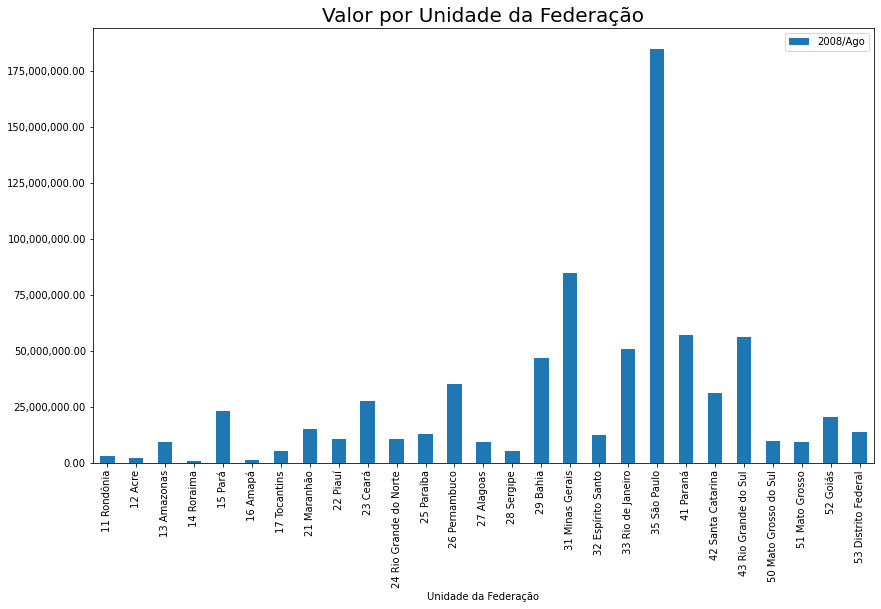

In [23]:
# melhorando ainda mais o gráfico anterior
## utilizando a biblioteca matplotlib conseguimos acesso aos eixos
ax = dados.plot(x = 'Unidade da Federação', y = '2008/Ago', kind = 'bar', figsize = (14, 8))

# formatando a saida da label dos valores de gastos por Unidade da Federação
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.title('Valor por Unidade da Federação', fontsize = 20)

plt.show()

### Desafio 01: escolher um título mais descritivo, que passa a mensagem adequada.

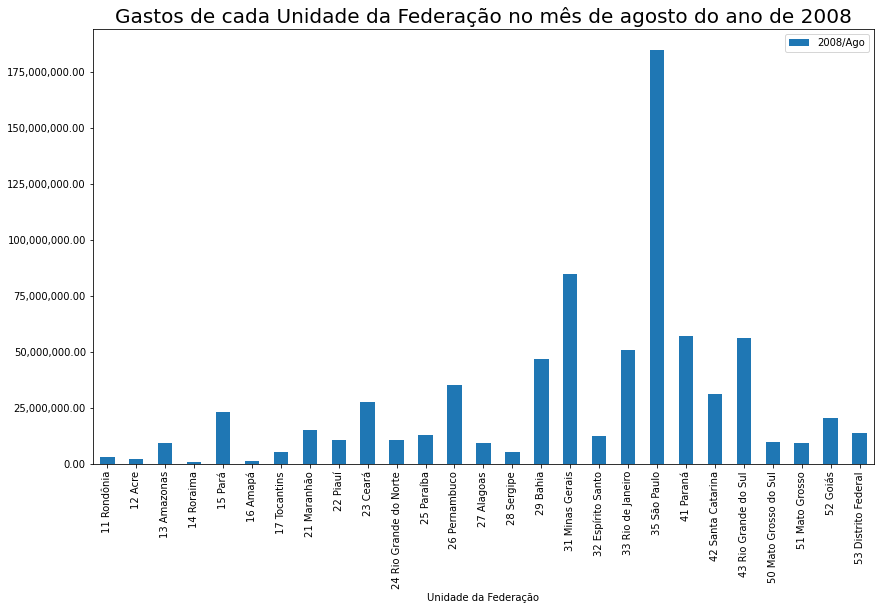

In [56]:
# gerando um gráfico que contém os gastos por Unidade da Federação no mês de agosto do ano de 2008
ax = dados.plot(x = 'Unidade da Federação', y = '2008/Ago', kind = 'bar', figsize = (14, 8))

# formatando a saida da label dos valores de gastos por Unidade da Federação
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.title('Gastos de cada Unidade da Federação no mês de agosto do ano de 2008', fontsize = 20)

plt.show()

### Desafio 02: faça a mesma análise pro mês mais recente.

In [52]:
# ao nalisarmos o mês mais recente, descobrimos que o Estado do Acre continha informação não válida
## para regularização momentanea, alteramos seu valor de '-' para 0 e seu tipo de dados para float
### seria o caso de descobrir o porquê do dado estar preenchido desta forma
dados['2020/Ago'] = dados['2020/Ago'].replace('-', 0)
dados['2020/Ago'] = dados['2020/Ago'].astype(float)

In [53]:
dados['2020/Ago']

0     10285455.78
1            0.00
2     14726443.67
3      2826486.18
4     39911193.02
5      2942273.94
6      8240261.38
7     28587541.78
8     23210624.20
9     59808605.59
10    24929930.72
11    22130016.81
12    75704177.72
13    19754741.78
14    11014180.89
15    80793117.08
16   168024412.95
17    32188873.88
18    95274486.35
19   346512263.17
20   129375911.54
21    63972379.36
22   101374341.51
23    19241624.02
24    17790649.87
25    43984702.05
26    26526196.39
Name: 2020/Ago, dtype: float64

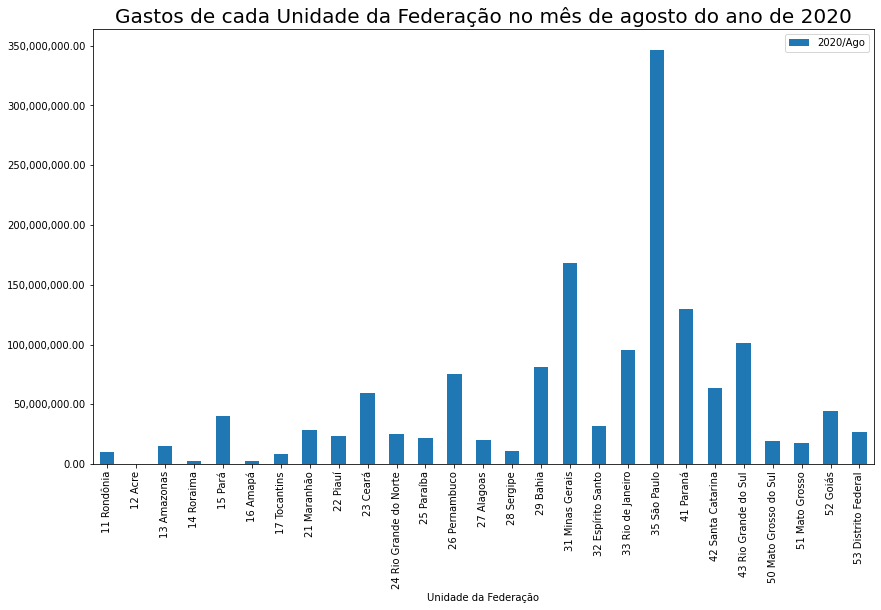

In [55]:
# gerando um gráfico que contém os gastos por Unidade da Federação no mês de agosto do ano de 2020
ax = dados.plot(x = 'Unidade da Federação', y = '2020/Ago', kind = 'bar', figsize = (14, 8))

# formatando a saida da label dos valores de gastos por Unidade da Federação
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.title('Gastos de cada Unidade da Federação no mês de agosto do ano de 2020', fontsize = 20)

plt.show()